# Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

##Load Dataframe of The Stock


In [2]:
!pip install yfinance  # Install if not already installed
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl size=264310 sha256=a8d6e53429d64a578f7b1f44dc94e3632a069f855f5dc5551bfdfaf8985003b9
  Stored in directory: /Users/jenilshingala/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [3]:
from google.colab import files

global_ticker = ""

def loadDFbyCSV():
  uploaded = files.upload()  # Opens a file selection dialog

  # Get the filename
  filename = list(uploaded.keys())[0]

  # Read the file into a DataFrame
  df = pd.read_csv(io.BytesIO(uploaded[filename]), na_values=False)  # Use pd.read_excel() for Excel files
  df.dropna(inplace=True)

  #Ticker of the stock market
  global global_ticker
  global_ticker = input("Enter the Ticker of the stock: ").strip().upper()

  return df

def loadDFbyTicker():
  global global_ticker
  global_ticker = input("Enter the Ticker of the stock: ").strip().upper()

  # Get stock data from Yahoo Finance
  stock_data = yf.Ticker(global_ticker)
  df = stock_data.history(period="max")     #we can adjust the term

  if df.shape[0] < 100:
    raise ValueError("DataFrame has less than 100 rows.")

  return df

ModuleNotFoundError: No module named 'google.colab'

### Upload stock file (.csv)

In [182]:
df = loadDFbyCSV()

df

Saving RELIANCE.csv to RELIANCE.csv
Enter the Ticker of the stock: RELI


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.068300,2.426239,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.943400,2.407380,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.064400,2.425650,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.916000,2.403243,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.806700,2.386739,76213503.0
...,...,...,...,...,...,...,...
5767,2018-10-29,1046.000000,1093.849976,1046.000000,1087.800049,1087.800049,7671807.0
5768,2018-10-30,1085.500000,1085.500000,1052.099976,1057.000000,1057.000000,8806701.0
5769,2018-10-31,1059.000000,1065.849976,1047.000000,1061.250000,1061.250000,16457691.0
5770,2018-11-01,1067.900024,1067.900024,1050.000000,1056.250000,1056.250000,9395873.0


### Search and Load stock file by Ticker

In [191]:
df = loadDFbyTicker()

df

Enter the Ticker of the stock: TSLA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-28 00:00:00-05:00,279.500000,293.880005,273.600006,292.980011,115697000,0.0,0.0
2025-03-03 00:00:00-05:00,300.339996,303.940002,277.299988,284.649994,115551400,0.0,0.0
2025-03-04 00:00:00-05:00,270.929993,284.350006,261.839996,272.040009,126706600,0.0,0.0


### Check if there is non-numeric or null value

In [192]:
import pandas as pd

# Identify non-numeric values in each column
non_numeric_counts = df.apply(lambda col: col.apply(pd.to_numeric, errors='coerce').isna().sum())

# Display columns with non-numeric values
print(non_numeric_counts[non_numeric_counts > 0])

# Check for missing values in each column
df.isnull().sum()

Series([], dtype: int64)


,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [193]:
print(df.shape)
df.describe()

(3695, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3695.000000,3695.000000,3695.000000,3695.000000,3.695000e+03,3695.0,3695.000000
mean,84.876822,86.739122,82.863023,84.830977,9.650470e+07,0.0,0.002165
std,111.495457,113.982738,108.717741,111.363113,7.732922e+07,0.0,0.095914
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,12.244000,12.464000,12.016333,12.232000,4.940925e+07,0.0,0.000000
50%,18.333332,18.645332,17.983334,18.334000,8.198160e+07,0.0,0.000000
75%,183.216667,186.415001,179.004997,182.964996,1.216455e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


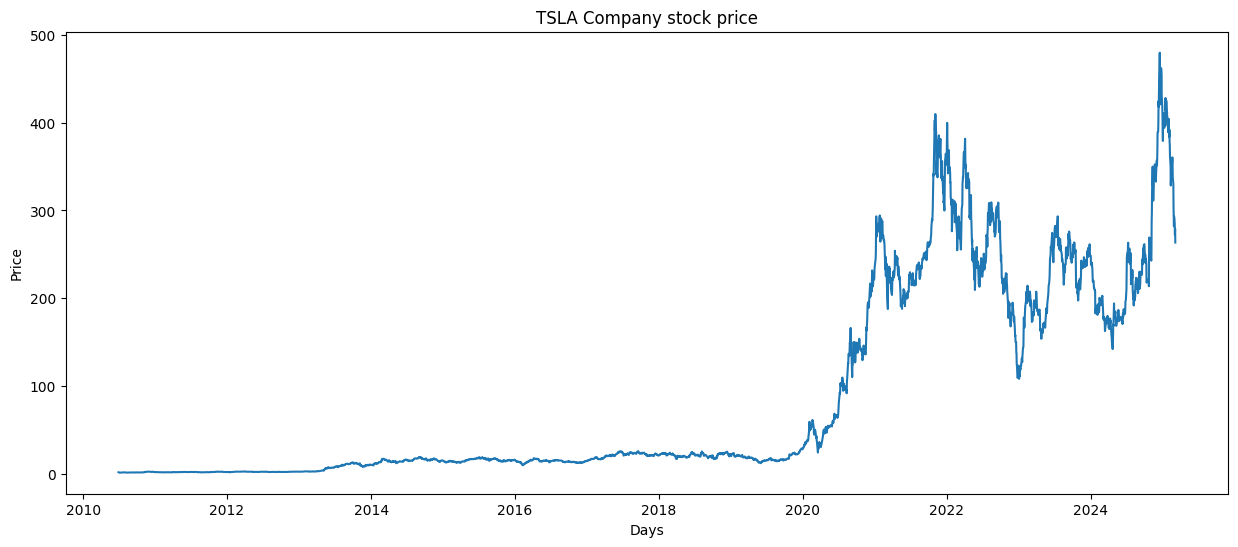

In [194]:
plt.figure(figsize=(15,6))  #size of the graph
plt.plot(df['Close'])
plt.title(global_ticker + ' Company stock price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Data Load (Community Sentiments by Ticker)

In [195]:
!pip install praw
import historical

historical.launch(global_ticker)    #Create reddit_data.csv

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

## NLP Pre-trained Model (sentiments by context)

In [187]:
# Use a pipeline as a high-level helper
from transformers import pipeline

sentiment_task = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_task("Covid cases are increasing fast!")    #sample

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'label': 'negative', 'score': 0.7235766649246216}]

### Function for sentiment value

In [196]:
def simplify_sentiment(row):
    sentiment_type = row['label']
    sentiment_value = row['score']

    if sentiment_type == 'negative':
      sentiment_value = -sentiment_value
    elif sentiment_type == 'neutral':
      sentiment_value -= 0.5

    return sentiment_value

### Create DataFrame based on the loaded posts by ticker

In [197]:
posts = pd.read_csv('./' + global_ticker + '_reddit_data.csv', na_values=False)
posts = posts[['Title', 'Post_Date', 'Upvotes']]
posts = posts.sort_values(by='Post_Date', ascending=True)

posts

,Title,Post_Date,Upvotes
467,"Elon Musk: ""we expect Tesla to become cash flo...",2012-10-04,114.0
135,TSLA is skyrocketing after reaching profitibality,2013-05-08,176.0
151,"If you are long TSLA right now, how do you jus...",2013-05-10,75.0
146,"Someone bought 2,000 shares of TSLA at around ...",2013-06-21,88.0
423,"TSLA, how to you value it?",2013-07-12,NaN
...,...,...,...
352,Waymo vs. Tesla: How Does Google’s Driverless ...,2025-03-03,47.0
469,Elon Musk tries and fails to pump Tesla’s stoc...,2025-03-04,3319.0
516,AAPL is the second most expensive Mag 7 behind...,2025-03-06,65.0
481,Why Shareholders sued Tesla (TSLA) in 2018 and...,2025-03-06,125.0


### Apply NLP --> sentiment value

In [198]:
sentiments = posts['Title'].apply(sentiment_task)

sentiment_df = sentiments.to_frame(name="Sentiments")
sentiment_df['label'] = sentiment_df['Sentiments'].apply(lambda x: x[0]['label'])
sentiment_df['score'] = sentiment_df['Sentiments'].apply(lambda x: x[0]['score'])
sentiment_df = sentiment_df.drop('Sentiments', axis=1)

sentiment_df['sentiment_value'] = sentiment_df.apply(simplify_sentiment, axis=1)    #positive == score, negative == -score, neutral -= 0.5

pd.concat([posts, sentiment_df], axis=1)

,Title,Post_Date,Upvotes,label,score,sentiment_value
467,"Elon Musk: ""we expect Tesla to become cash flo...",2012-10-04,114.0,positive,0.892467,0.892467
135,TSLA is skyrocketing after reaching profitibality,2013-05-08,176.0,positive,0.866974,0.866974
151,"If you are long TSLA right now, how do you jus...",2013-05-10,75.0,neutral,0.883106,0.383106
146,"Someone bought 2,000 shares of TSLA at around ...",2013-06-21,88.0,neutral,0.620501,0.120501
423,"TSLA, how to you value it?",2013-07-12,NaN,neutral,0.855158,0.355158
...,...,...,...,...,...,...
352,Waymo vs. Tesla: How Does Google’s Driverless ...,2025-03-03,47.0,neutral,0.916469,0.416469
469,Elon Musk tries and fails to pump Tesla’s stoc...,2025-03-04,3319.0,neutral,0.643664,0.143664
516,AAPL is the second most expensive Mag 7 behind...,2025-03-06,65.0,negative,0.703079,-0.703079
481,Why Shareholders sued Tesla (TSLA) in 2018 and...,2025-03-06,125.0,neutral,0.787820,0.287820


# Clean the sentiment data

In [199]:
grouped_df = pd.concat([posts, sentiment_df], axis=1)
grouped_df = grouped_df.drop('Title', axis=1)
grouped_df = grouped_df.dropna()      #Remove NaN values

#Compress the duplicates by averaging 'Upvotes' and 'sentiment_value' cloumns
grouped_df = combined_df.groupby('Post_Date').agg({
    'Upvotes': 'mean',  # Calculate the average of Upvotes
    'sentiment_value': 'mean'  # Calculate the average of sentiment scores
}).reset_index()

#Weight sentiment_value by Upvotes
grouped_df['log_weighted_sentiment'] = grouped_df['sentiment_value'] * np.log(grouped_df['Upvotes'])
grouped_df['weighted_sentiment'] = grouped_df['sentiment_value'] * grouped_df['log_weighted_sentiment']

grouped_df
#Conclusion: log_weighted_sentiment is the best choice

,Post_Date,Upvotes,sentiment_value,log_weighted_sentiment,weighted_sentiment
0,2012-10-04,116.0,0.892467,4.242423,3.786223
1,2013-05-08,178.0,0.866974,4.492473,3.894859
2,2013-05-10,74.0,0.383106,1.648911,0.631707
3,2013-06-21,87.0,0.120501,0.538145,0.064847
4,2013-07-17,90.0,-0.706329,-3.178347,2.244960
...,...,...,...,...,...
375,2025-02-27,73.5,0.301827,1.297038,0.391482
376,2025-03-03,46.0,0.416469,1.594509,0.664063
377,2025-03-04,3310.0,0.143664,1.164351,0.167275
378,2025-03-06,99.5,-0.207630,-0.955129,0.198313


In [201]:
new_sentiment_df = grouped_df[['Post_Date', 'log_weighted_sentiment']]
new_sentiment_df = new_sentiment_df.rename(columns={'Post_Date': 'date', 'log_weighted_sentiment': 'sentiment'})

new_sentiment_df      #Final form of sentiment dataframe

,date,sentiment
0,2012-10-04,4.242423
1,2013-05-08,4.492473
2,2013-05-10,1.648911
3,2013-06-21,0.538145
4,2013-07-17,-3.178347
...,...,...
375,2025-02-27,1.297038
376,2025-03-03,1.594509
377,2025-03-04,1.164351
378,2025-03-06,-0.955129


# Data Preprocessing

In [202]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [ ]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


### Merge sentiment data by date

In [211]:
new_df = df[['Open', 'High', 'Low', 'Close', 'Volume']]   #Drop the unnecessary columns

new_sentiment_df['date'] = pd.to_datetime(new_sentiment_df['date'])
new_df.index = pd.to_datetime(new_df.index).tz_localize(None)

new_df = new_df.merge(new_sentiment_df, left_index=True, right_on='date', how='left')         #how='left': keeping all data of new_df, how='right': merge data that only exist in new_sentiment_df
new_df['sentiment'] = new_df['sentiment'].fillna(0)         #if there is no sentiment data on the date, fill it with 0

new_df

,Open,High,Low,Close,Volume,date,sentiment
NaN,1.266667,1.666667,1.169333,1.592667,281494500,2010-06-29,0.000000
NaN,1.719333,2.028000,1.553333,1.588667,257806500,2010-06-30,0.000000
NaN,1.666667,1.728000,1.351333,1.464000,123282000,2010-07-01,0.000000
NaN,1.533333,1.540000,1.247333,1.280000,77097000,2010-07-02,0.000000
NaN,1.333333,1.333333,1.055333,1.074000,103003500,2010-07-06,0.000000
...,...,...,...,...,...,...,...
NaN,279.500000,293.880005,273.600006,292.980011,115697000,2025-02-28,0.000000
376.0,300.339996,303.940002,277.299988,284.649994,115551400,2025-03-03,1.594509
377.0,270.929993,284.350006,261.839996,272.040009,126706600,2025-03-04,1.164351
NaN,272.920013,279.549988,267.709991,279.100006,94042900,2025-03-05,0.000000


## Data Encoding/Splitting

In [212]:
import numpy as np
import pandas as pd

# normalization (z-score for the numeric values) except the outputs ('Close' column)
encode_numeric_zscore(new_df, 'Open')
encode_numeric_zscore(new_df, 'High')
encode_numeric_zscore(new_df, 'Low')
encode_numeric_zscore(new_df, 'Volume')

new_df

,Open,High,Low,Close,Volume,date,sentiment
NaN,-0.749897,-0.746363,-0.751429,1.592667,2.392237,2010-06-29,0.000000
NaN,-0.745837,-0.743193,-0.747897,1.588667,2.085910,2010-06-30,0.000000
NaN,-0.746310,-0.745825,-0.749755,1.464000,0.346277,2010-07-01,0.000000
NaN,-0.747506,-0.747474,-0.750712,1.280000,-0.250975,2010-07-02,0.000000
NaN,-0.749299,-0.749287,-0.752478,1.074000,0.084041,2010-07-06,0.000000
...,...,...,...,...,...,...,...
NaN,1.745570,1.817300,1.754424,292.980011,0.248189,2025-02-28,0.000000
376.0,1.932484,1.905559,1.788457,284.649994,0.246307,2025-03-03,1.594509
377.0,1.668706,1.733691,1.646254,272.040009,0.390563,2025-03-04,1.164351
NaN,1.686555,1.691580,1.700247,279.100006,-0.031835,2025-03-05,0.000000


In [213]:
new_df = new_df.drop('date', axis=1)
x = new_df.drop(columns = ['Close']).to_numpy()
y = new_df['Close'].to_numpy()

x[:5], y[4]

(array([[-0.74989742, -0.74636262, -0.75142924,  2.39223672,  0.        ],
        [-0.74583747, -0.74319255, -0.74789716,  2.08591008,  0.        ],
        [-0.74630983, -0.74582453, -0.74975518,  0.34627661,  0.        ],
        [-0.7475057 , -0.7474739 , -0.75071179, -0.25097498,  0.        ],
        [-0.74929949, -0.74928704, -0.75247783,  0.08404068,  0.        ]]),
 1.0740000009536743)

## Data Time Steps Setup

In [214]:
import numpy as np

def to_sequences(seq_size, data, output_df):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        after_window = output_df[i+seq_size]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)

In [215]:
# Create sequences of 7 days for input and 1 day for output
SEQUENCE_DATE = 5

seq_x, seq_y = to_sequences(SEQUENCE_DATE, x, y)

print("Shape of x: {}".format(seq_x.shape))
print("Shape of y: {}".format(seq_y.shape))

#The shape is in LSTM format!!

Shape of x: (3689, 5, 5)
Shape of y: (3689,)


In [216]:
print(seq_x[0], seq_y[0])

new_df[:6]

[[-0.74989742 -0.74636262 -0.75142924  2.39223672  0.        ]
 [-0.74583747 -0.74319255 -0.74789716  2.08591008  0.        ]
 [-0.74630983 -0.74582453 -0.74975518  0.34627661  0.        ]
 [-0.7475057  -0.7474739  -0.75071179 -0.25097498  0.        ]
 [-0.74929949 -0.74928704 -0.75247783  0.08404068  0.        ]] 1.053333044052124


<ipython-input-216-b09f97303416>:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  new_df[:6]


,Open,High,Low,Close,Volume,sentiment
NaN,-0.749897,-0.746363,-0.751429,1.592667,2.392237,0.000000
NaN,-0.745837,-0.743193,-0.747897,1.588667,2.085910,0.000000
NaN,-0.746310,-0.745825,-0.749755,1.464000,0.346277,0.000000
NaN,-0.747506,-0.747474,-0.750712,1.280000,-0.250975,0.000000
NaN,-0.749299,-0.749287,-0.752478,1.074000,0.084041,0.000000
...,...,...,...,...,...,...
NaN,-0.660806,-0.661057,-0.660484,11.105333,0.221376,0.000000
NaN,-0.662552,-0.662479,-0.662011,11.082000,-0.181706,0.000000
NaN,-0.661362,-0.663046,-0.661496,11.081333,-0.192802,0.000000
NaN,-0.659131,-0.655431,-0.658504,11.861333,1.777004,0.000000


In [217]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(seq_x, seq_y, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2766, 5, 5), (923, 5, 5), (2766,), (923,))

# RNN model (LSTM)

## Model Creating (RNN)

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np

model = Sequential()
input_shape = x_train.shape[1:]

model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=input_shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))   #output layer

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model Training (RNN)

In [219]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

moniter = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/rnn.keras", verbose=0, save_best_only=True)

model.fit(x_train, y_train, epochs = 100,
          verbose = 2, validation_data = (x_test, y_test), callbacks=[moniter, checkpointer])

model.load_weights('dnn/rnn.keras')

Epoch 1/100
87/87 - 8s - 95ms/step - loss: 18615.2520 - val_loss: 16027.4775
Epoch 2/100
87/87 - 4s - 49ms/step - loss: 12640.5723 - val_loss: 8917.8887
Epoch 3/100
87/87 - 2s - 24ms/step - loss: 5425.5264 - val_loss: 2937.0713
Epoch 4/100
87/87 - 4s - 41ms/step - loss: 1569.5403 - val_loss: 969.3417
Epoch 5/100
87/87 - 4s - 47ms/step - loss: 588.5742 - val_loss: 437.8501
Epoch 6/100
87/87 - 2s - 26ms/step - loss: 280.6960 - val_loss: 234.5210
Epoch 7/100
87/87 - 3s - 29ms/step - loss: 167.5882 - val_loss: 155.7240
Epoch 8/100
87/87 - 4s - 44ms/step - loss: 117.0291 - val_loss: 107.3614
Epoch 9/100
87/87 - 2s - 26ms/step - loss: 90.4400 - val_loss: 93.0831
Epoch 10/100
87/87 - 3s - 29ms/step - loss: 79.0192 - val_loss: 85.1087
Epoch 11/100
87/87 - 2s - 25ms/step - loss: 76.0056 - val_loss: 72.4789
Epoch 12/100
87/87 - 2s - 24ms/step - loss: 63.7200 - val_loss: 88.3347
Epoch 13/100
87/87 - 3s - 36ms/step - loss: 74.3397 - val_loss: 73.7687
Epoch 14/100
87/87 - 2s - 24ms/step - loss: 61.

## Model Evaluation (RNN)

In [220]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Final score (RMSE): 7.162790637480243


# Visualization
### Function

In [221]:
#Imports and Methods
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

# Regression chart.
def chart_regression(pred,y,sort=True):
  plt.figure(figsize=(9,6))
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by=['y'],inplace=True)
  a = plt.plot(t['y'].tolist(),label='expected', color = 'blue')
  b = plt.plot(t['pred'].tolist(),label='prediction', color = 'red')
  plt.ylabel('output')
  plt.legend()
  plt.show()

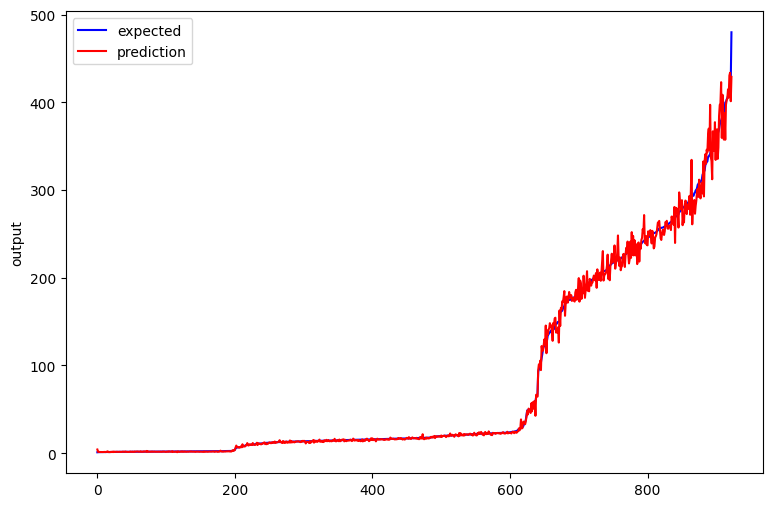

In [222]:
# Plot the chart
chart_regression(pred.flatten(),y_test, sort=True)

# Real Implementation

In [223]:
START_DATE = 1   # number of days before

sample = new_df.iloc[-SEQUENCE_DATE -1 * START_DATE:-1 * START_DATE]  # Picks the last days
answer_sample = new_df.iloc[-1 * START_DATE]

print(answer_sample)
sample

Open           1.678841
High           1.631044
Low            1.629513
Close        263.450012
Volume         0.019902
sentiment     -0.955129
Name: 378.0, dtype: float64


,Open,High,Low,Close,Volume,sentiment
375.0,1.850149,1.846691,1.821386,281.950012,0.067807,1.297038
NaN,1.745570,1.817300,1.754424,292.980011,0.248189,0.000000
376.0,1.932484,1.905559,1.788457,284.649994,0.246307,1.594509
377.0,1.668706,1.733691,1.646254,272.040009,0.390563,1.164351
NaN,1.686555,1.691580,1.700247,279.100006,-0.031835,0.000000


In [224]:
sample = sample[['Open', 'High', 'Low', 'Volume', 'sentiment']]
answer_sample = answer_sample[['Close']]

np_sample = sample.to_numpy()
np_sample = np_sample.reshape(1, sample.shape[0], sample.shape[1])
np_sample.shape

(1, 5, 5)

In [225]:
pred_sample = model.predict(np_sample)
pred_sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[273.852]], dtype=float32)